# Chapter 6 Transfer Learning with MoblieNetV2

# Preprocess Data

In [1]:
import numpy as np
import tensorflow as tf
import os

import matplotlib.pyplot as plt
#import cv2
#print("OpenCV-Python Version {}".format(cv2.__version__))
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tqdm import tqdm

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/dataset/car_aaa'

In [54]:
train_dir = os.path.join(path,"training_set")
test_dir = os.path.join(path,"test_set")

# ImageDataGenerator

In [55]:
data_gen_train = ImageDataGenerator(rescale = 1/255.)
data_gen_test = ImageDataGenerator(rescale = 1/255.)

In [56]:
train_generator= data_gen_train.flow_from_directory(train_dir,target_size = (128,128),batch_size = 128,class_mode = "binary")
test_generator= data_gen_test.flow_from_directory(test_dir,target_size = (128,128),batch_size = 128,class_mode = "binary")


Found 79 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [57]:
test_generator[0]

(array([[[[0.03921569, 0.04313726, 0.0509804 ],
          [0.04705883, 0.0509804 , 0.05882353],
          [0.04705883, 0.0509804 , 0.05882353],
          ...,
          [0.04313726, 0.03529412, 0.03921569],
          [0.03529412, 0.02745098, 0.03137255],
          [0.02745098, 0.01960784, 0.02352941]],
 
         [[0.03921569, 0.04313726, 0.0509804 ],
          [0.04313726, 0.04705883, 0.05490196],
          [0.04705883, 0.0509804 , 0.05882353],
          ...,
          [0.03529412, 0.02745098, 0.03137255],
          [0.04705883, 0.03921569, 0.04313726],
          [0.03137255, 0.02352941, 0.02745098]],
 
         [[0.03921569, 0.04313726, 0.0509804 ],
          [0.04705883, 0.0509804 , 0.05882353],
          [0.04705883, 0.0509804 , 0.05882353],
          ...,
          [0.04313726, 0.03529412, 0.03921569],
          [0.03529412, 0.02745098, 0.03137255],
          [0.02352941, 0.01568628, 0.01960784]],
 
         ...,
 
         [[0.03137255, 0.03137255, 0.03921569],
          [0.03529

In [58]:
train_generator.image_shape

(128, 128, 3)

In [59]:
train_generator.filenames

['car/car1.jpg',
 'car/car10.jpg',
 'car/car11.jpg',
 'car/car12.jpg',
 'car/car13.jpg',
 'car/car14.jpg',
 'car/car15.jpg',
 'car/car16.jpg',
 'car/car17.jpg',
 'car/car18.jpg',
 'car/car19.jpg',
 'car/car2.jpg',
 'car/car20.jpg',
 'car/car21.jpg',
 'car/car22.jpg',
 'car/car23.jpg',
 'car/car24.jpg',
 'car/car25.jpg',
 'car/car26.jpg',
 'car/car27.jpg',
 'car/car28.jpg',
 'car/car29.jpg',
 'car/car3.jpg',
 'car/car30.jpg',
 'car/car31.jpg',
 'car/car32.jpg',
 'car/car33.jpg',
 'car/car34.jpg',
 'car/car35.jpg',
 'car/car36.jpg',
 'car/car37.jpg',
 'car/car38.jpg',
 'car/car39.jpg',
 'car/car4.jpg',
 'car/car40.jpg',
 'car/car5.jpg',
 'car/car6.jpg',
 'car/car7.jpg',
 'car/car8.jpg',
 'car/car9.jpg',
 'motocycal/motocycal1.jpg',
 'motocycal/motocycal10.jpg',
 'motocycal/motocycal11.jpg',
 'motocycal/motocycal12.jpg',
 'motocycal/motocycal13.jpg',
 'motocycal/motocycal14.jpg',
 'motocycal/motocycal15.jpg',
 'motocycal/motocycal16.jpg',
 'motocycal/motocycal17.jpg',
 'motocycal/motocyca

In [60]:
train_generator.num_classes

2

In [61]:
class_n  = train_generator.classes
class_n

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [62]:
class_n.shape

(79,)

In [63]:
class_names = ['CAR', 'MOTORCYCLES']

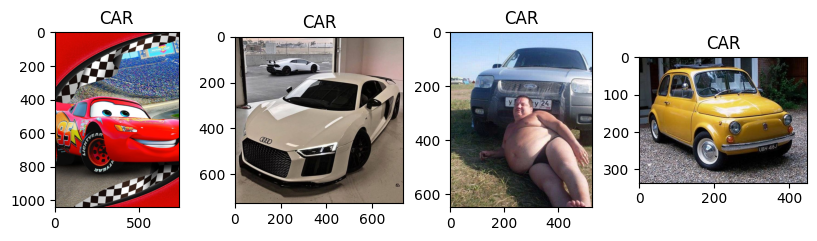

In [64]:
import matplotlib.pyplot as plt
import os

src_path = "/content/drive/MyDrive/Colab Notebooks/dataset/car_aaa/training_set"
sub_train = os.listdir(src_path)
fig = plt.figure(figsize=(10,5))
for i in range(4):
    #path = os.path.join(src_path,sub_train[i])
    train_generator.filenames
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(src_path,train_generator.filenames[i]))
    plt.title(class_names[train_generator.classes[i]])
    plt.imshow(img, cmap=plt.get_cmap('gray'))

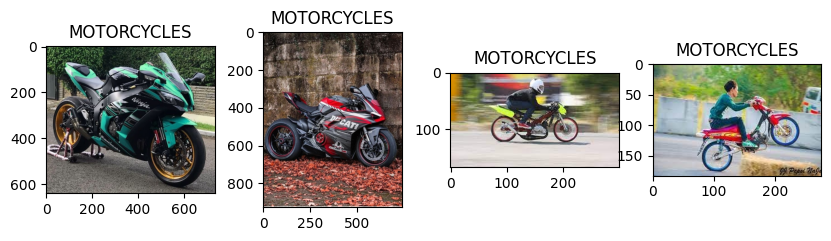

In [68]:
fig = plt.figure(figsize=(10,5))
for i in range(4):
    #path = os.path.join(src_path,sub_train[i])
    train_generator.filenames
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(src_path,train_generator.filenames[60-i]))
    plt.title(class_names[train_generator.classes[60-i]])
    plt.imshow(img, cmap=plt.get_cmap('gray'))

# Loading base model

**input_shape:** Optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with "channels_last" data format) or (3, 224, 224) (with "channels_first" data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value. Defaults to None. input_shape will be ignored if the input_tensor is provided.

**include_top:** Boolean, whether to include the fully-connected layer at the top of the network. Defaults to True.

**weights:** One of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded. Defaults to "imagenet".

# MobileNet
[see pretrain model from keras application](https://keras.io/api/applications/#usage-examples-for-image-classification-models)

MobileNet, The inputshape can be 128x128 , 160x160, 192x192, 224x224.

In [70]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),include_top = False, weights = "imagenet") # include_top= false บอกว่าเป็นการ fix weight and bias โ่ด่ย่่ให้มีการตัด   head  ออก

In [71]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

 out_relu (ReLU)             (None, 4, 4, 1280)           --> use to flatten

In [72]:
base_model_trainable = False  #fix weight and bias ตาม model ต้นฉบับ

# ADD custom head

In [73]:
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=1,activation = 'sigmoid')(average_pooling_layer)


In [74]:
model = tf.keras.models.Model(inputs=base_model.input, outputs = prediction_layer)

In [75]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

# Train Model

In [76]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [77]:
history = model.fit(train_generator, batch_size=10,epochs=3,validation_data = test_generator)

Epoch 1/3
1/1 [==============================] - 21s 21s/step - loss: 0.6617 - accuracy: 0.6076 - val_loss: 0.3382 - val_accuracy: 0.9000
Epoch 2/3
1/1 [==============================] - 9s 9s/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.3283 - val_accuracy: 0.9000
Epoch 3/3
1/1 [==============================] - 7s 7s/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.3221 - val_accuracy: 0.9000


# Fine Tuning

In [78]:
len(base_model.layers)

154

In [79]:
base_model.trainable = True

In [80]:
for layer in base_model.layers[:100]:  #layer 0-100 จะ fix weight and bias เพราะส่วนนี้จะทำหน้าที่หาคุณลักษณะสำคัญของภาพเช่นขอบของภาพ
  layer.trainable = False

In [81]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [82]:
history = model.fit(train_generator,epochs=3,validation_data = test_generator)

Epoch 1/3
1/1 [==============================] - 13s 13s/step - loss: 0.0936 - accuracy: 1.0000 - val_loss: 0.2378 - val_accuracy: 0.9500
Epoch 2/3
1/1 [==============================] - 3s 3s/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2319 - val_accuracy: 0.9500
Epoch 3/3
1/1 [==============================] - 5s 5s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2283 - val_accuracy: 0.9500


In [83]:
loss0, accuracy0 = model.evaluate(test_generator)

1/1 [==============================] - 1s 917ms/step - loss: 0.2283 - accuracy: 0.9500


In [84]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.23
initial accuracy: 0.95


In [85]:
probabilities = model.predict_generator(generator=test_generator)

<ipython-input-85-1cadbf1ed5b8>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator(generator=test_generator)


In [86]:
y_true = test_generator.classes

In [87]:
y_pred = (probabilities > 0.5).astype("int32")

In [88]:
y_pred

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[5 5]
 [6 4]]


In [90]:
model.save("CATDOG_model.h5")
print('saved model to disk')

saved model to disk


In [91]:
model.save('/content/drive/MyDrive/Colab Notebooks/machine learning/CATDOG_model.h5')
print('saved model to drive')

saved model to drive


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


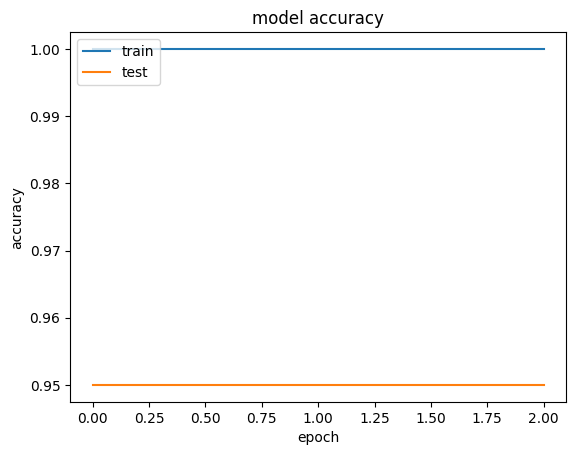

In [92]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

# Load Model

In [93]:
from numpy import loadtxt
from keras.models import load_model
#load model
model = load_model('CATDOG_model.h5')
#summaize model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


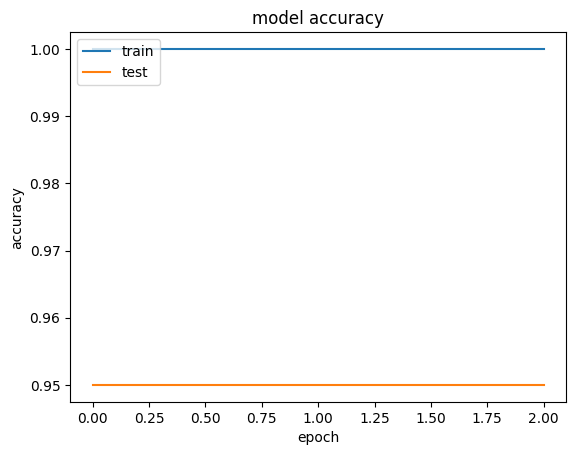

In [94]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

# Unseen Data

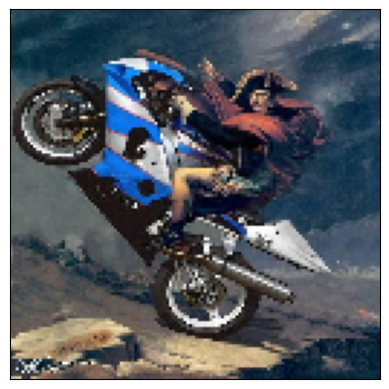

In [103]:
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img

x_new1 = load_img(
    '/content/unseen1.jpg',
    target_size=(128, 128),
)
plt.xticks([])
plt.yticks([])
plt.imshow(x_new1)

In [104]:
from tensorflow.keras.utils import img_to_array

x_new1 =  img_to_array(x_new1)
x_new1_re = x_new1.reshape(1, 128,128,3)
print("unseen shape", x_new1_re.shape)
predictions = model.predict(x_new1_re)
print(predictions)
classes_x = (predictions[0] > 0.5).astype("int32") #binary class
print('Your image ispredicted as a',class_names[classes_x[0]])
print( classes_x)
if classes_x == 0:
   print(' predicted as CAR')
else:
  print(' predicted as MORTORCYCLE')

unseen shape (1, 128, 128, 3)
1/1 [==============================] - 0s 65ms/step
[[0.20719177]]
Your image ispredicted as a CAR
[0]
 predicted as CAR


# Example of VGG16 Model

https://github.com/packtpublishing/machine-learning-for-algorithmic-trading-second-edition/blob/master/18_convolutional_neural_nets/10_transfer_learning.ipynb

# Exercise
ให้นักศึกษาประยุกต์ใช้ MobileNETV2 กับข้อมูลรูปภาพนักศึกษาตาม Assignment ก่อนหน้านี้